# Data Preparation



In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [58]:
teams_full = pd.read_csv('grouped_data_with_players.csv')


# Select only numeric columns
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric variables
correlation_matrix = numeric_teams_full.corr()

# Filter the correlation matrix for correlations greater than 0.95
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.95]

# Create a dictionary to store the new variable calculations
new_columns = {}
# Set to store columns to drop
columns_to_drop = set()

for column in high_correlation.columns:
    for index in range(len(high_correlation)):
        if abs(high_correlation[column][index]) > 0.95 and column != high_correlation.index[index]:
            feature_1 = high_correlation.index[index]
            feature_2 = column
            
            # Create a new column name for the quotient
            new_column_name = f"{feature_1}_div_{feature_2}"
            # Calculate the quotient and store it in teams_full
            teams_full[new_column_name] = teams_full[feature_1] / teams_full[feature_2]
            
            # Add the original columns to the drop set
            columns_to_drop.add(feature_1)
            columns_to_drop.add(feature_2)

# Drop the original columns with high correlation from teams_full
teams_full.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(teams_full.head())

   year tmID franchID confID  rank playoff firstRound semis finals  \
0     9  ATL      ATL     EA     7       N        NaN   NaN    NaN   
1    10  ATL      ATL     EA     2       Y          L   NaN    NaN   
2     1  CHA      CHA     EA     8       N        NaN   NaN    NaN   
3     2  CHA      CHA     EA     4       Y          W     W      L   
4     3  CHA      CHA     EA     2       Y          L   NaN    NaN   

              name  ...  d_dreb_div_d_reb  d_fgm_div_d_pts  lost_div_won  \
0    Atlanta Dream  ...          0.683004         0.352206      7.500000   
1    Atlanta Dream  ...          0.699319         0.356096      0.888889   
2  Charlotte Sting  ...          0.670707         0.361877      3.000000   
3  Charlotte Sting  ...          0.622393         0.364360      0.777778   
4  Charlotte Sting  ...          0.677596         0.364744      0.777778   

   won_div_lost  min_div_GP  homeL_div_homeW  homeW_div_homeL  \
0      0.133333  200.735294        16.000000         0.06

In [59]:
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numeric variables
correlation_matrix = numeric_teams_full.corr()

# Filter the correlation matrix for correlations greater than 0.95
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.95]

# Create a dictionary to store the new variable calculations
new_columns = {}
# Set to store columns to drop
columns_to_drop = set()

for column in high_correlation.columns:
    for index in range(len(high_correlation)):
        if abs(high_correlation[column][index]) > 0.95 and column != high_correlation.index[index]:
            feature_1 = high_correlation.index[index]
            feature_2 = column
            
            # Create a new column name for the quotient
            new_column_name = f"{feature_1}_div_{feature_2}"
            # Calculate the quotient and store it
            new_columns[new_column_name] = numeric_teams_full[feature_1] / numeric_teams_full[feature_2]
            
            # Add the original columns to the drop set
            columns_to_drop.add(feature_1)
            columns_to_drop.add(feature_2)

# Add the new quotient columns to the DataFrame
for new_col_name, new_col_data in new_columns.items():
    numeric_teams_full[new_col_name] = new_col_data

# Drop the original columns with high correlation
numeric_teams_full.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(numeric_teams_full.head())

   year  rank  o_fga  o_ftm  o_fta  o_oreb  o_dreb  o_reb  o_asts  o_pf  ...  \
0     9     7   2258    542    725     340     737   1077     492   796  ...   
1    10     2   2428    569    755     404     855   1259     547   741  ...   
2     1     8   1903    431    577     305     630    935     551   713  ...   
3     2     4   1780    410    528     309     639    948     467   605  ...   
4     3     2   1790    490    663     302     653    955     496   647  ...   

   o_3pa_div_o_3pm_div_o_3pm_div_o_3pa  o_pts_div_o_fgm_div_o_fgm_div_o_pts  \
0                             8.763945                             8.016174   
1                            10.763004                             6.902079   
2                             8.682245                             7.247501   
3                             7.825366                             7.588326   
4                             6.238157                             8.470368   

   d_fgm_div_d_pts_div_d_pts_div_d_fgm  d_ft

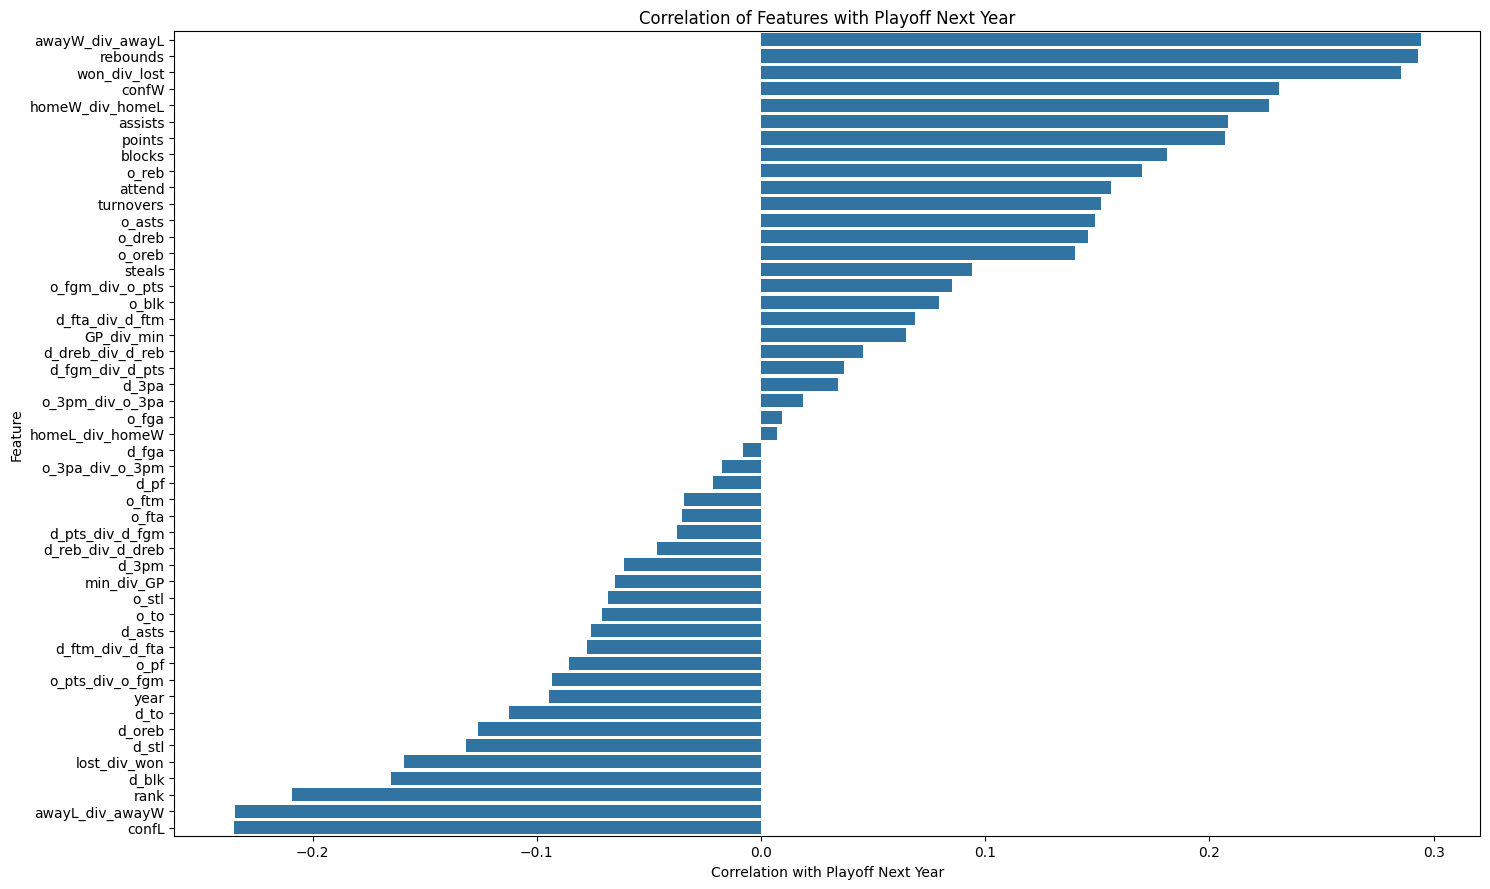

In [60]:
# Select only numeric columns
numeric_teams_full = teams_full.select_dtypes(include=['number'])

# Calculate correlation of all numeric variables with the target variable
correlations = numeric_teams_full.corr()['playoffNextYear']

# Drop the correlation of the target with itself
correlations = correlations.drop('playoffNextYear')

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Display the sorted correlation values
correlation_df = sorted_correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot sorted correlations
plt.figure(figsize=(15, 9))
sns.barplot(x='Correlation', y='Feature', data=correlation_df)

# Add labels and title
plt.xlabel('Correlation with Playoff Next Year')
plt.ylabel('Feature')
plt.title('Correlation of Features with Playoff Next Year')
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
teams_full.head()

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,d_dreb_div_d_reb,d_fgm_div_d_pts,lost_div_won,won_div_lost,min_div_GP,homeL_div_homeW,homeW_div_homeL,awayL_div_awayW,awayW_div_awayL,GP_div_min
0,9,ATL,ATL,EA,7,N,NaN,NaN,NaN,Atlanta Dream,...,0.683004,0.352206,7.500000,0.133333,200.735294,16.000000,0.062500,4.666667,0.214286,0.004982
1,10,ATL,ATL,EA,2,Y,L,NaN,NaN,Atlanta Dream,...,0.699319,0.356096,0.888889,1.125000,204.411765,0.416667,2.400000,1.833333,0.545455,0.004892
2,1,CHA,CHA,EA,8,N,NaN,NaN,NaN,Charlotte Sting,...,0.670707,0.361877,3.000000,0.333333,202.343750,2.200000,0.454545,4.333333,0.230769,0.004942
3,2,CHA,CHA,EA,4,Y,W,W,L,Charlotte Sting,...,0.622393,0.364360,0.777778,1.285714,203.125000,0.454545,2.200000,1.285714,0.777778,0.004923
4,3,CHA,CHA,EA,2,Y,L,NaN,NaN,Charlotte Sting,...,0.677596,0.364744,0.777778,1.285714,201.562500,0.454545,2.200000,1.285714,0.777778,0.004961


In [62]:
features = ['awayW_div_awayL', 'won_div_lost', 'rebounds', 'homeL_div_homeW', 'assists']
target = 'playoffNextYear'

In [63]:
train_data = teams_full[teams_full['year'] < 5]
test_data = teams_full[teams_full['year'].isin([6,7])]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

In [64]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.5555555555555556
Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.36      0.40        11
         1.0       0.61      0.69      0.65        16

    accuracy                           0.56        27
   macro avg       0.53      0.53      0.52        27
weighted avg       0.54      0.56      0.55        27



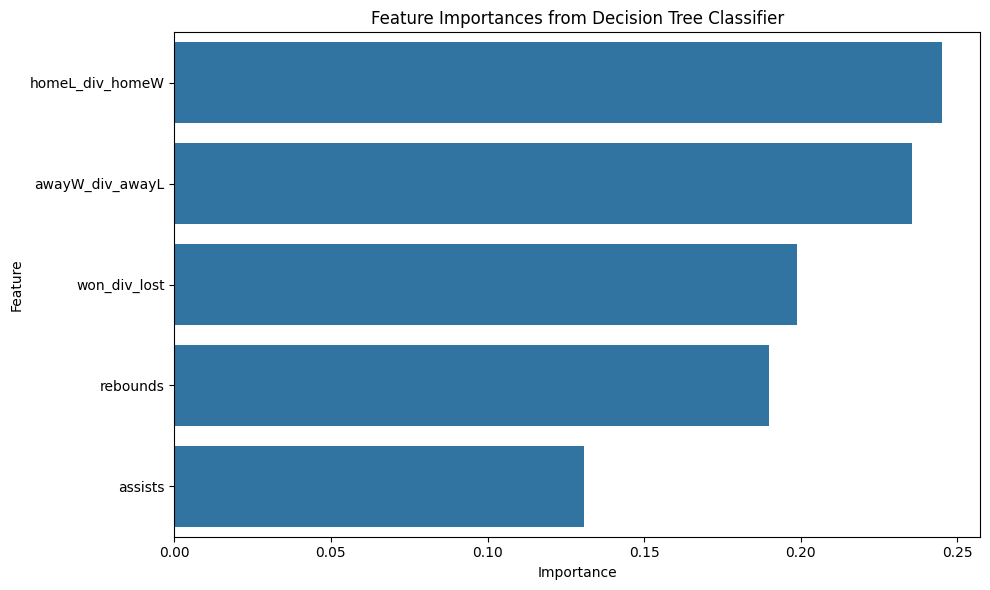

In [65]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
# Random forest study

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.4074074074074074
Classification Report:
               precision    recall  f1-score   support

         0.0       0.27      0.27      0.27        11
         1.0       0.50      0.50      0.50        16

    accuracy                           0.41        27
   macro avg       0.39      0.39      0.39        27
weighted avg       0.41      0.41      0.41        27



In [71]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test):
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Predict
    y_pred = classifier.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f'Algorithm: {classifier.__class__.__name__}')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', report)
    print('-' * 60)

In [96]:
classifiers = [
    LogisticRegression(),
    SGDClassifier(),
    SVC(),  # Support Vector Classifier
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),  # Naive Bayes
    LinearDiscriminantAnalysis(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=100) 
]

In [97]:
for classifier in classifiers:
    evaluate_model(classifier, X_train, X_test, y_train, y_test)

Algorithm: LogisticRegression
Accuracy: 0.5555555555555556
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.55      0.50        11
         1.0       0.64      0.56      0.60        16

    accuracy                           0.56        27
   macro avg       0.55      0.55      0.55        27
weighted avg       0.57      0.56      0.56        27

------------------------------------------------------------
Algorithm: SGDClassifier
Accuracy: 0.4074074074074074
Classification Report:
               precision    recall  f1-score   support

         0.0       0.41      1.00      0.58        11
         1.0       0.00      0.00      0.00        16

    accuracy                           0.41        27
   macro avg       0.20      0.50      0.29        27
weighted avg       0.17      0.41      0.24        27

------------------------------------------------------------
Algorithm: SVC
Accuracy: 0.5555555555555556
Classification Repo

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packag